In [1]:
# Google colab setup.
import subprocess
import sys

def setup_google_colab_execution():
    subprocess.run(["git", "clone", "https://github.com/bookingcom/uplift-modeling-for-marketing-personalization-tutorial"]) 
    subprocess.run(["pip", "install", "-r", "uplift-modeling-for-marketing-personalization-tutorial/tutorial/requirements-colab.txt"]) 
    subprocess.run(["cp", "uplift-modeling-for-marketing-personalization-tutorial/tutorial/notebooks/utils.py", "./"])

running_on_google_colab = 'google.colab' in sys.modules

if running_on_google_colab:
    setup_google_colab_execution()

# Challenges in Production

## 1. Model Robustness and Adaptiveness

A model is considered robust if it has the ability to maintain its performance across different environments and over time. If a model is not robust, its predictions may become inaccurate when applied to real-world data, leading to suboptimal decisions and potential business losses.

### Data drifts

Several factors can challenge the robustness of an uplift model, including:

#### Covariate Shift

Over time, the distribution of input data (features) may change due to shifts in customer behavior, market conditions, or external factors. For example, customer preferences might evolve, or new competitors might enter the market, leading to changes in the data patterns the model relies on.



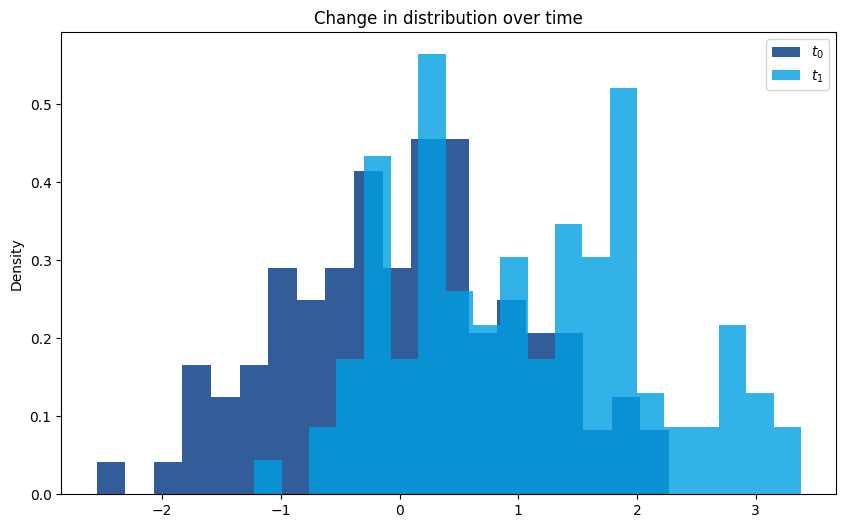

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import booking_colors
from cycler import cycler
plt.rc('axes', prop_cycle=cycler(color=list(booking_colors.values())))

np.random.seed(0)
time = np.arange(0, 100)
feature_t0 = np.random.normal(0, 1, 100)
feature_t1 = np.random.normal(1, 1, 100)

# Plot for Data Drift
plt.figure(figsize=(10, 6))
plt.hist(feature_t0, bins=20, alpha=0.8, label='$t_0$', color=booking_colors['dark blue'], density=True)
plt.hist(feature_t1, bins=20, alpha=0.8, label='$t_1$', color=booking_colors['light blue'], density=True)
plt.title('Change in distribution over time')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Concept Drift

Unlike covariate shift, concept drift occurs when the relationship between the features and the target outcome changes over time. For instance, if a model predicts customer churn based on past behavior, a change in the company’s pricing strategy might alter the factors influencing churn, causing concept drift.

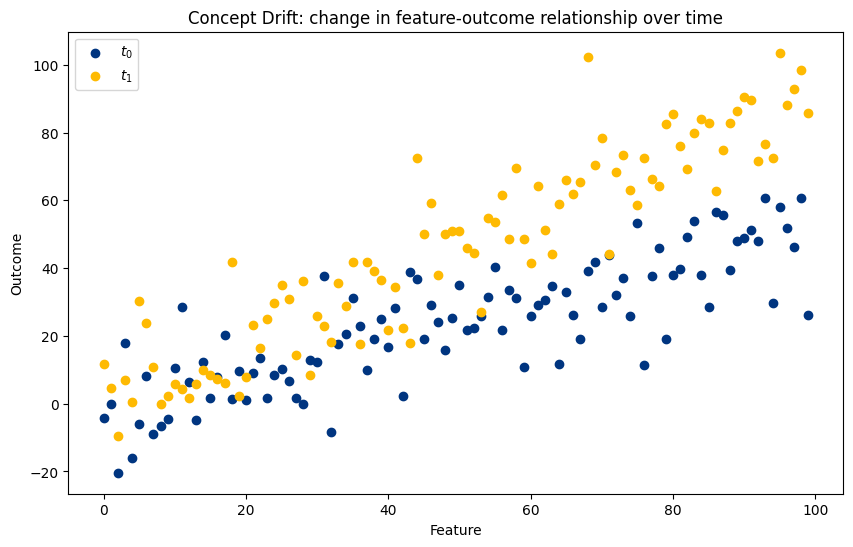

In [3]:
# Generate sample data for concept drift
np.random.seed(2)
x = np.arange(0, 100)
outcome_t0 = 0.5 * x + np.random.normal(0, 10, 100)
outcome_t1 = 0.9 * x + np.random.normal(0, 10, 100)

# Plot for Concept Drift
plt.figure(figsize=(10, 6))
plt.scatter(time, outcome_t0, label='$t_0$', color=booking_colors['dark blue'])
plt.scatter(time, outcome_t1, label='$t_1$', color=booking_colors['yellow'])
plt.title('Concept Drift: change in feature-outcome relationship over time')
plt.xlabel('Feature')
plt.ylabel('Outcome')
plt.legend()
plt.show()


### Strategies to Build Robust Models 

To ensure that your uplift model remains robust and adapt to the environment, consider the following strategies:


#### Monitoring

**ML Metrics Monitoring**: Implement monitoring systems to regularly check for signs of data drift or other issues. This involves tracking the distribution of input features and the model’s predictions over time. If significant deviations are detected, it may indicate that the model's assumptions no longer hold, necessitating further investigation or action.

**Business KPI Monitoring**: Implement monitoring systems to regularly check if your model is performing in production according to the business metrics. Business metrics will give a different perspective about how your model is performing compared to traditional ML metrics. 


#### Update the Model

**Automated Model Retraining**: Set up automated pipelines that regularly update the model based on new data. Automation reduces the time lag between data changes and model updates, ensuring that the model remains aligned with the latest trends.

**Incremental Learning**: Implement incremental learning techniques that allow the model to update its parameters continuously as new data becomes available. This approach helps the model stay current without the need for full re-training, which can be resource-intensive. This approach is particularly useful when the data is collected in real-time and full model retraining is too expensive (e.g. when using deep learning models).

**Feedback Loops**: Incorporate feedback loops where the model’s predictions are evaluated against real-world outcomes. Use this feedback to refine the model continually. For example, if a model predicts that a customer will respond positively to a marketing offer, track the actual response and use this information to adjust the model.

## 2. Other Common Operational Challenges

### Features Parity Online vs Offline

Feature Parity in online/offline match refers to ensuring that the features used during model training (offline) are equivalent with those available during serving (online). This equivalence is crucial for maintaining model accuracy and reliability in production.

#### Importance of Feature Parity

**Prediction Consistency**: Discrepancies between training and deployment features can lead to inconsistent model predictions, undermining the model's effectiveness in real-time applications.

**Model Integrity**: Aligning features between offline and online environments preserves the model's integrity, ensuring it performs as expected when exposed to live data.

#### Challenges

**Different Pipelines**: Feature engineering processes may differ between training and deployment, causing misalignments.

**Real-Time Availability:** Some features used in training might not be accessible or feasible to compute in real-time, leading to potential gaps.

#### Mitigation Strategies
**Unified Pipeline**: Use the same feature engineering pipeline for both offline training and online deployment to minimize discrepancies.

**Feature Stores**: A feature store ensures training/serving parity by centralizing and managing consistent feature definitions across both offline training and online serving environments, reducing discrepancies and simplifying feature reuse.

**Monitoring**: Implement systems to compare online and offline features, ensuring consistency and catching discrepancies early.

### Latency and Scalability in Model Deployment
Latency and Scalability are crucial considerations when deploying machine learning models, particularly in how the model's architecture and complexity influence its performance under different conditions.

#### Importance of Latency and Scalability

**Model Response Time**: Latency refers to the time it takes for a model to process an input and produce a prediction. In real-time applications, models must deliver predictions quickly to be useful, making low latency a key requirement.

**Handling Large-Scale Predictions**: Scalability involves the model's ability to maintain performance as the number of predictions or data volume increases. This is essential for applications that need to process large amounts of data or serve many users simultaneously.

#### Challenges

**Complexity vs. Speed**: More complex models, like deep neural networks or large ensemble methods, often provide higher accuracy but at the cost of increased latency. These models require more computation, which can slow down prediction times, especially in real-time environments.

#### Mitigation Strategies

**Model Simplification**: Simplifying the model architecture, such as using a smaller neural network or fewer trees in an ensemble, can reduce latency while maintaining an acceptable level of accuracy. Reducing the number of features is also another way to simplify your model, if applicable.

